## Drug Screening Panels Data Analysis

Import required packages and classes

In [1]:
import pharmacoset
import importlib
import utils
import myPlots


In [2]:
importlib.reload(pharmacoset) 
importlib.reload(utils)

from pharmacoset import PharmacoSet
from utils import Tools, DrugAnalysis

### Create PharmacoSets
PharmacoSet class is defined in data.py file.

In [3]:
gdsc_path = "../processed_data/gdsc2_normalized_mapped.tsv"
ccle_path = "../processed_data/ccle_normalized_mapped.tsv"

gdsc = PharmacoSet(filepath= gdsc_path, name= "gdsc2")
ccle = PharmacoSet(filepath= ccle_path, name= "ccle")

gdsc.data.head()


,cell_line,drug,dose,response,dataset
0,CVCL_1045,123138,0.000000,1.0,gdsc2
1,CVCL_1045,123138,0.001001,1.0,gdsc2
2,CVCL_1045,123138,0.003164,1.0,gdsc2
3,CVCL_1045,123138,0.010004,1.0,gdsc2
4,CVCL_1045,123138,0.031631,1.0,gdsc2


Find and filter overlapping cell line - drug pairs.
After using filter_common_pairs method, filtered data can be accessed from PharmacoSet object by '.overlapping_data' accessor. 

In [4]:
common_pairs = Tools.find_common_pairs(gdsc, ccle)
common_pairs

{Pandas(cell_line='CVCL_0253', drug='palbociclib'),
 Pandas(cell_line='CVCL_1405', drug='selumetinib'),
 Pandas(cell_line='CVCL_0334', drug='selumetinib'),
 Pandas(cell_line='CVCL_1697', drug='crizotinib'),
 Pandas(cell_line='CVCL_1349', drug='sorafenib'),
 Pandas(cell_line='CVCL_1067', drug='erlotinib'),
 Pandas(cell_line='CVCL_1693', drug='crizotinib'),
 Pandas(cell_line='CVCL_0378', drug='lapatinib'),
 Pandas(cell_line='CVCL_3005', drug='nutlin-3'),
 Pandas(cell_line='CVCL_0547', drug='paclitaxel'),
 Pandas(cell_line='CVCL_0511', drug='nutlin-3'),
 Pandas(cell_line='CVCL_0079', drug='erlotinib'),
 Pandas(cell_line='CVCL_3152', drug='crizotinib'),
 Pandas(cell_line='CVCL_1818', drug='crizotinib'),
 Pandas(cell_line='CVCL_1036', drug='pd0325901'),
 Pandas(cell_line='CVCL_0270', drug='nilotinib'),
 Pandas(cell_line='CVCL_3084', drug='plx-4720'),
 Pandas(cell_line='CVCL_1823', drug='nilotinib'),
 Pandas(cell_line='CVCL_1555', drug='palbociclib'),
 Pandas(cell_line='CVCL_1798', drug='lap

In [5]:
gdsc.filter_common_pairs(common_pairs)
ccle.filter_common_pairs(common_pairs)

Find common concetration range of the overlapping data.

In [6]:
common_conc = Tools.common_concentration_ranges(gdsc.overlapping_data, ccle.overlapping_data)
common_conc.head()

,cell_line_,drug_,common_min_dose,common_max_dose
0,cvcl_0012,crizotinib,0.002500,8.0
1,cvcl_0012,erlotinib,0.010005,8.0
2,cvcl_0012,irinotecan,0.005003,5.0
3,cvcl_0012,lapatinib,0.010005,8.0
4,cvcl_0012,nilotinib,0.010005,8.0


Compute AUC for all drugs across all cell lines for a given PharmacoSet

In [7]:

all_drug_ccle = ccle.get_recomp_auc_values(common_conc, p_filter= 0.05, log_fc= -0.5)
all_drug_gdsc = gdsc.get_recomp_auc_values(common_conc, p_filter= 0.05, log_fc= -0.5)



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


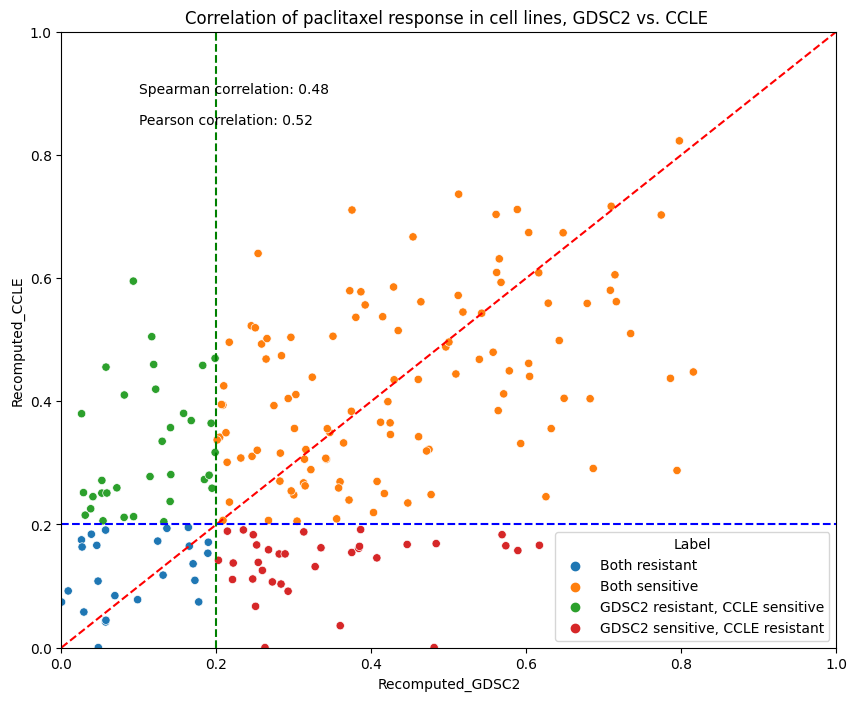

In [19]:
import myPlots
importlib.reload(myPlots)
from myPlots import Plotting

Plotting.correlation_plot(gdsc, ccle, "paclitaxel", method= 'recomputed')